<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_4'

In [5]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.719183,39.175324,40.461265,187.355773,2233.475933,-2046.120161
1,0.0,1.0,53.467880,42.478189,-1684.021139,-1578.075070,-2066.919358,488.844287
2,0.0,2.0,75.537285,73.216941,-325.746965,-166.992739,777.754681,-944.747420
3,0.0,3.0,72.676530,72.150190,-4487.579259,-4332.752538,472.073133,-4804.825672
4,0.0,4.0,40.961767,34.042427,1132.871594,1217.875788,-3484.770587,4702.646375
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,87.635383,50.317118,-3812.970989,-3665.018488,1622.974067,-5287.992555
19996,999.0,16.0,40.885136,62.223000,730.614132,843.722268,320.734914,522.987354
19997,999.0,17.0,80.362489,91.246625,-3637.571764,-3455.962650,3461.059281,-6917.021931
19998,999.0,18.0,45.875907,44.486716,-822.547826,-722.185203,-400.086640,-322.098563


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.719183,39.175324,40.461265,187.355773,2233.475933,-2046.120161
1,0.0,1.0,53.467880,42.478189,-1684.021139,-1578.075070,-2066.919358,488.844287
2,0.0,2.0,75.537285,73.216941,-325.746965,-166.992739,777.754681,-944.747420
3,0.0,3.0,72.676530,72.150190,-4487.579259,-4332.752538,472.073133,-4804.825672
4,0.0,4.0,40.961767,34.042427,1132.871594,1217.875788,-3484.770587,4702.646375
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,87.635383,50.317118,-3812.970989,-3665.018488,1622.974067,-5287.992555
19996,999.0,16.0,40.885136,62.223000,730.614132,843.722268,320.734914,522.987354
19997,999.0,17.0,80.362489,91.246625,-3637.571764,-3455.962650,3461.059281,-6917.021931
19998,999.0,18.0,45.875907,44.486716,-822.547826,-722.185203,-400.086640,-322.098563


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    97.719183  39.175324    40.461265   187.355773  2233.475933   
      1.0    53.467880  42.478189 -1684.021139 -1578.075070 -2066.919358   
      2.0    75.537285  73.216941  -325.746965  -166.992739   777.754681   
      3.0    72.676530  72.150190 -4487.579259 -4332.752538   472.073133   
      4.0    40.961767  34.042427  1132.871594  1217.875788 -3484.770587   
...                ...        ...          ...          ...          ...   
999.0 15.0   87.635383  50.317118 -3812.970989 -3665.018488  1622.974067   
      16.0   40.885136  62.223000   730.614132   843.722268   320.734914   
      17.0   80.362489  91.246625 -3637.571764 -3455.962650  3461.059281   
      18.0   45.875907  44.486716  -822.547826  -722.185203  -400.086640   
      19.0   61.294738  66.178970 -4331.590247 -4194.116538  1367.267543   

                   e_hat  
rep   index               
0.0   0.0   -2046.120161  
      1.0     488.844287  
      2.0    -944.747420  
      3.0   -4804.825672  
      4.0    4702.646375  
...                  ...  
999.0 15.0  -5287.992555  
      16.0    522.987354  
      17.0  -6917.021931  
      18.0   -322.098563  
      19.0  -5561.384081  

[20000 rows x 6 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    97.719183  39.175324    40.461265   187.355773  2233.475933   
      1.0    53.467880  42.478189 -1684.021139 -1578.075070 -2066.919358   
      2.0    75.537285  73.216941  -325.746965  -166.992739   777.754681   
      3.0    72.676530  72.150190 -4487.579259 -4332.752538   472.073133   
      4.0    40.961767  34.042427  1132.871594  1217.875788 -3484.770587   
...                ...        ...          ...          ...          ...   
999.0 15.0   87.635383  50.317118 -3812.970989 -3665.018488  1622.974067   
      16.0   40.885136  62.223000   730.614132   843.722268   320.734914   
      17.0   80.362489  91.246625 -3637.571764 -3455.962650  3461.059281   
      18.0   45.875907  44.486716  -822.547826  -722.185203  -400.086640   
      19.0   61.294738  66.178970 -4331.590247 -4194.116538  1367.267543   

                   e_hat  
rep   index               
0.0   0.0   -2046.120161  
      1.0     488.844287  
      2.0    -944.747420  
      3.0   -4804.825672  
      4.0    4702.646375  
...                  ...  
999.0 15.0  -5287.992555  
      16.0    522.987354  
      17.0  -6917.021931  
      18.0   -322.098563  
      19.0  -5561.384081  

[20000 rows x 6 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.719183,39.175324,40.461265,187.355773,2233.475933,-2046.120161
1,0.0,1.0,53.467880,42.478189,-1684.021139,-1578.075070,-2066.919358,488.844287
2,0.0,2.0,75.537285,73.216941,-325.746965,-166.992739,777.754681,-944.747420
3,0.0,3.0,72.676530,72.150190,-4487.579259,-4332.752538,472.073133,-4804.825672
4,0.0,4.0,40.961767,34.042427,1132.871594,1217.875788,-3484.770587,4702.646375
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,87.635383,50.317118,-3812.970989,-3665.018488,1622.974067,-5287.992555
19996,999.0,16.0,40.885136,62.223000,730.614132,843.722268,320.734914,522.987354
19997,999.0,17.0,80.362489,91.246625,-3637.571764,-3455.962650,3461.059281,-6917.021931
19998,999.0,18.0,45.875907,44.486716,-822.547826,-722.185203,-400.086640,-322.098563


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    97.719183  39.175324    40.461265   187.355773  2233.475933   
      1.0    53.467880  42.478189 -1684.021139 -1578.075070 -2066.919358   
      2.0    75.537285  73.216941  -325.746965  -166.992739   777.754681   
      3.0    72.676530  72.150190 -4487.579259 -4332.752538   472.073133   
      4.0    40.961767  34.042427  1132.871594  1217.875788 -3484.770587   
...                ...        ...          ...          ...          ...   
999.0 15.0   87.635383  50.317118 -3812.970989 -3665.018488  1622.974067   
      16.0   40.885136  62.223000   730.614132   843.722268   320.734914   
      17.0   80.362489  91.246625 -3637.571764 -3455.962650  3461.059281   
      18.0   45.875907  44.486716  -822.547826  -722.185203  -400.086640   
      19.0   61.294738  66.178970 -4331.590247 -4194.116538  1367.267543   

                   e_hat  
rep   index               
0.0   0.0   -2046.120161  
      1.0     488.844287  
      2.0    -944.747420  
      3.0   -4804.825672  
      4.0    4702.646375  
...                  ...  
999.0 15.0  -5287.992555  
      16.0    522.987354  
      17.0  -6917.021931  
      18.0   -322.098563  
      19.0  -5561.384081  

[20000 rows x 6 columns]

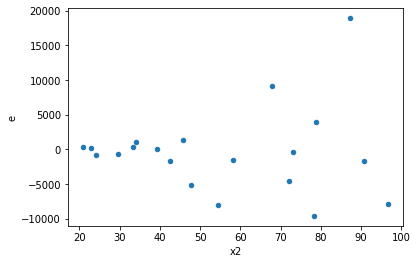

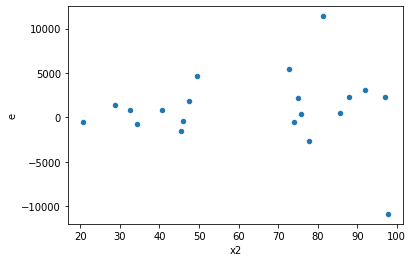

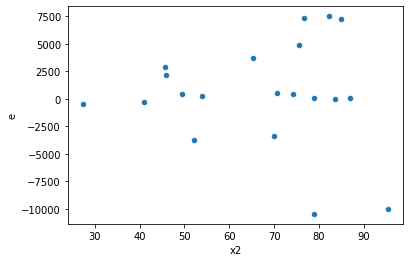

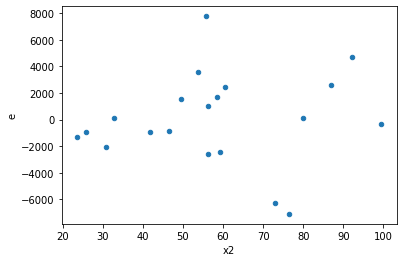

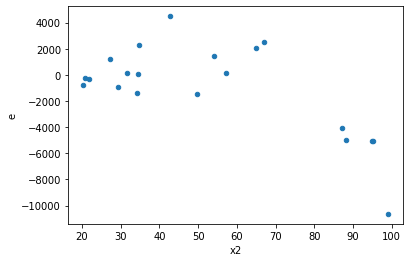

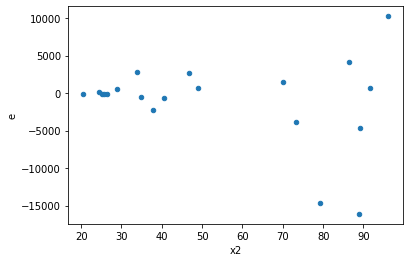

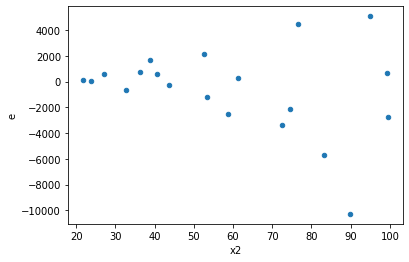

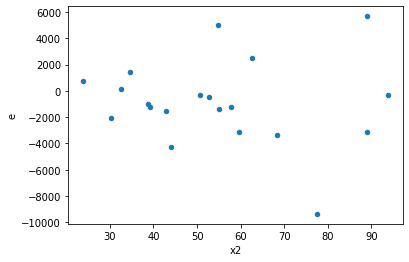

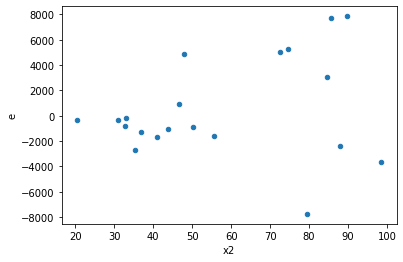

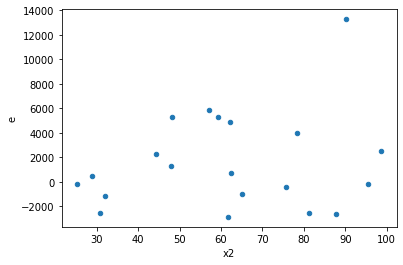

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,22398590.000094272,217696090.90166765,3733098.3333490454,36282681.81694461,9.71918727476825,0.014050896983194283,0.9929745515084029,0.007025448491597142,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,135364823.78505343,197654298.57091746,22560803.96417557,32942383.09515291,1.4601599813314414,0.6573851328685265,0.6713074335657367,0.32869256643426326,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,24792918.82072531,77671075.65710267,4132153.136787552,12945179.276183778,3.1327927227420505,0.19045111513358393,0.904774442433208,0.09522555756679196,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,26746604.923724078,87123411.30939706,4457767.487287346,14520568.551566176,3.2573633759445526,0.17644518233660622,0.9117774088316969,0.08822259116830311,Reject005=1 : Homoscedasticity
9.0,6.0,6.0,16389739.272366825,178582555.69074172,2731623.2120611374,29763759.281790286,10.895997350722517,0.010432650184111214,0.9947836749079444,0.005216325092055607,Reject005=0 : Heteroscedasticity
10.0,6.0,6.0,9377466.739796858,477512996.3727007,1562911.1232994765,79585499.39545012,50.92132125046011,0.00013879083834233974,0.9999306045808288,6.939541917116987e-05,Reject005=0 : Heteroscedasticity
11.0,6.0,6.0,12703435.01448853,274429659.6341623,2117239.1690814216,45738276.60569372,21.602791632434034,0.0016190771377706525,0.9991904614311147,0.0008095385688853263,Reject005=0 : Heteroscedasticity
12.0,6.0,6.0,4835758.968000222,66997753.82779841,805959.828000037,11166292.304633068,13.8546512080408,0.005502046534112459,0.9972489767329438,0.0027510232670562296,Reject005=0 : Heteroscedasticity
13.0,6.0,6.0,44436838.90087531,418188119.0822184,7406139.816812552,69698019.8470364,9.410843107338605,0.01526880352521598,0.992365598237392,0.00763440176260799,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,22398590.000094272,217696090.90166765,3733098.3333490454,36282681.81694461,9.71918727476825,0.014050896983194283,Reject005=0 : Heteroscedasticity
1.0,6.0,6.0,116366712.08671795,62394679.41092733,19394452.01445299,10399113.235154556,0.5361901036133945,0.4673579624751835,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,135364823.78505343,197654298.57091746,22560803.96417557,32942383.09515291,1.4601599813314414,0.6573851328685265,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,24792918.82072531,77671075.65710267,4132153.136787552,12945179.276183778,3.1327927227420505,0.19045111513358393,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,25743243.88938567,6015570.340591096,4290540.648230945,1002595.0567651828,0.23367569240453834,0.10022449314189642,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,499526792.93716824,6639596.433571648,83254465.48952805,1106599.4055952746,0.013291772388286674,4.425786362077018e-05,Reject005=0 : Heteroscedasticity
6.0,6.0,6.0,177705346.90007588,4099308.883992083,29617557.816679314,683218.1473320138,0.023068010926520593,0.00022158545376884563,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,25826411.08665779,25612526.369564615,4304401.847776298,4268754.394927436,0.9917183724685745,0.9922037809871422,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,26746604.923724078,87123411.30939706,4457767.487287346,14520568.551566176,3.2573633759445526,0.17644518233660622,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    554
Reject005=1 : Homoscedasticity      446
Name: Result_test, dtype: int64